## Теория вероятностей и Математическая статистика

### Тема-7. Многомерный статистический анализ. Линейная регрессия.

#### ДР

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### 1.

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
```
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
```
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)

In [3]:
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [4]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

**Парная линейная регрессия**

y_hat = a + bx

In [5]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b

2.620538882402765

In [6]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

y = 444.18 + 2.62*x

In [7]:
y_hat = a + b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

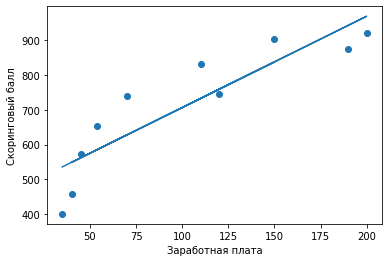

In [8]:
plt.scatter(x, y)
plt.plot(x, y_hat)
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.show()

In [9]:
r = b * np.std(x) / np.std(y)
r

0.8874900920739162

In [10]:
R2 = r ** 2
R2

0.7876386635293682

In [11]:
A_mean = (abs((y - y_hat) / y)).sum() / len(x) * 100
A_mean

11.46925184356171

**Матричный метод**

In [12]:
n = len(x)
xm = x.reshape((n, 1))
xm

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [13]:
ym = y.reshape((n, 1))
ym

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

y = b0 + b1 * x

In [14]:
bm = np.dot(np.linalg.inv(np.dot(xm.T, xm)), xm.T@ym)
bm

array([[5.88982042]])

In [15]:
bm1 = np.dot(np.linalg.inv(np.dot(xm.T, xm)), xm.T@ym)
bm1

array([[5.88982042]])

In [16]:
xm = np.hstack([np.ones((n, 1)), xm])
xm

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [17]:
bm2 = np.dot(np.linalg.inv(np.dot(xm.T, xm)), xm.T@ym)
bm2

array([[444.17735732],
       [  2.62053888]])

In [18]:
y_hat1 = bm1[0] * x
y_hat1

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

In [19]:
y_hat2 = bm2[0] + bm2[1] * x
y_hat2

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

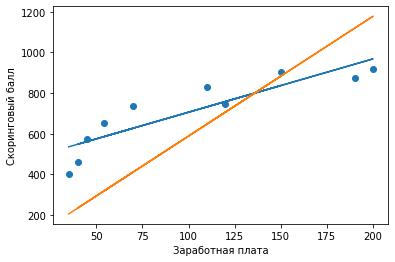

In [20]:
plt.scatter(x, y)
plt.plot(x, y_hat2)
plt.plot(x, y_hat1)
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.show()

##### 2. 

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [21]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

x = np.array(zp)
y = np.array(ks)
n = len(x)

In [22]:
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [23]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [24]:
# mse = (1/n) * np.sum((B1 * x - y) ** 2)
# mse_p = (2/n) * np.sum((B1 * x - y) * x)

In [25]:
def mse_(B1, y=y, x=x, n=n):
    return (1/n) * np.sum((B1 * x - y) ** 2)

def mse_p(B1, y=y, x=x, n=n):
    return (2/n) * np.sum((B1 * x - y) * x)

In [26]:
alpha = 2e-6
B1 = 0
for i in range(501):
    B1 -= alpha * mse_p(B1)
    if not i % 50:
        print(f'iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

iteration: 0, B1 = 0.32456680000000004, mse = 483206.37291419966
iteration: 50, B1 = 5.5627582368316855, mse = 57990.53679549011
iteration: 100, B1 = 5.8705994323669835, mse = 56521.94813058985
iteration: 150, B1 = 5.888690829524075, mse = 56516.87599431581
iteration: 200, B1 = 5.889754035670109, mse = 56516.85847643147
iteration: 250, B1 = 5.8898165188105285, mse = 56516.858415929106
iteration: 300, B1 = 5.889820190857434, mse = 56516.85841572014
iteration: 350, B1 = 5.889820406658501, mse = 56516.85841571939
iteration: 400, B1 = 5.889820419340829, mse = 56516.858415719405
iteration: 450, B1 = 5.889820420086153, mse = 56516.858415719405
iteration: 500, B1 = 5.889820420129954, mse = 56516.858415719405


значение b1 соответствует значению, вычисленному матричным методом